<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_105/blob/main/Reto_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto-> Entrega 2 (18/11)

Portada con datos generales: Nombre de la entrega, tu nombre, matrícula, materia, profesor, fecha

Nombres:


*   Juan Pablo Acosta López - A01794035
*   Yocelín Juárez Arroyo- A00819828

Materia Ciencia y analítica de datos


Profesor tutor: Victoria Guerrero Orozco

Fecha 15/11/2022

Ciencia y análitica de datos

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import requests, zipfile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
import math as math

In [2]:
#This method Imports zip directly
# importing necessary modules

print('Downloading started')

#Defining the zip file URL
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/Calidad_del_agua')
Rawdf = pd.read_csv('/content/sample_data/Calidad_del_agua/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',sep=',', encoding_errors='ignore')
df = Rawdf

pd.set_option('display.max_columns', 100)


In [3]:
pd.set_option('display.max_rows', 100)
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestic

In [4]:
df.replace('<20',20, inplace= True)
df.replace('<25',25, inplace= True)
df.replace('<1.1',1.1, inplace= True)
df.replace('<0.02',0.02, inplace= True)
df.replace('<0.01',0.01, inplace= True)
df.replace('<0.003',0.003, inplace= True)
df.replace('<0.005',0.005, inplace= True)
df.replace('<0.0005',0.0005, inplace= True)
df.replace('<0.0015',0.0015, inplace= True)
df.replace('<0.025',0.025, inplace= True)
df.replace('<0.2',0.2, inplace= True)
 
df.replace('SI',1, inplace= True)
df.replace('NO',0, inplace= True)
df.replace('ND',0, inplace= True)

df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Verde,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Rojo,"FLUO,AS,",1,1,1,1,0,1,1,1,0,1,1,1,1,1,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Verde,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,0.01,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Rojo,"NO3,",1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestico,1.1,Potable - Excelente,14.615488,No apta como FAAP,0.01,Potable - Excelente,0.003,Potable - Excelente,0.00

In [5]:
Numeric_Columns_List = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                        'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','LONGITUD','LATITUD','PERIODO']

for i in range(0, len(Numeric_Columns_List)):
  df[Numeric_Columns_List[i]] = pd.to_numeric(df[Numeric_Columns_List[i]])

String_Columns_List = ['CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3',
                       'CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CLAVE','SITIO','ORGANISMO_DE_CUENCA',
                       'ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','SEMAFORO','CONTAMINANTES']

for i in range(0, len(String_Columns_List)):
  df[String_Columns_List[i]].values.astype('str')

Binary_Columns_List = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF',
                       'CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

for i in range(0, len(Binary_Columns_List)):
  df[Binary_Columns_List[i]].values.astype('bool')

print(df.dtypes)

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_

A continuación se enlistaran los features que se considerarán para el modelo

In [6]:
Columns_to_keep = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                        'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                        'LONGITUD','LATITUD','CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra',
                        'CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF',
                        'CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR',
                        'CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']


X = pd.DataFrame(df.drop(['CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3',
                       'CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CLAVE','SITIO','ORGANISMO_DE_CUENCA',
                       'ESTADO','MUNICIPIO','ACUIFERO','CONTAMINANTES','SEMAFORO','PERIODO','CALIDAD_ALC','SDT_mg/L','SUBTIPO'], axis = 1))

y = pd.DataFrame(df['SEMAFORO'])

In [7]:
X

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,-102.20075,21.99958,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,-102.28801,22.36685,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1
3,-102.29449,22.18435,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,-110.24480,23.45138,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1
1064,-99.70099,24.78280,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1065,-99.82249,25.55197,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1
1066,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
y.replace('Verde',1, inplace= True)
y.replace('Rojo',3, inplace= True)
y.replace('Amarillo',2, inplace= True)

y

,SEMAFORO
0,1
1,1
2,3
3,1
4,3
...,...
1063,3
1064,3
1065,3
1066,1


In [9]:
Xtv, Xtest, ytv, ytest = train_test_split(X,y, train_size=.80, random_state=100, stratify = y[['SEMAFORO']])

Xtv.dropna()
Xtest.dropna()

print(ytv['SEMAFORO'].value_counts())
print(ytest['SEMAFORO'].value_counts())

1    347
3    309
2    198
Name: SEMAFORO, dtype: int64
1    87
3    78
2    49
Name: SEMAFORO, dtype: int64


In [10]:
NumericList = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                        'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','LONGITUD','LATITUD']

BinaryList = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF',
                       'CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

#Define each pipeline for each type of category

NumericColumnsPipeline = Pipeline(steps= [('MinMax', MinMaxScaler(feature_range=(1, 2))),('inputdata',SimpleImputer(strategy='most_frequent'))])
BinaryColumnsPipeline = Pipeline(steps= [('inputdata',SimpleImputer(strategy='most_frequent'))])

#Define the column transformer that applies pipelines

TransformColumns = ColumnTransformer(transformers = [('numerical',NumericColumnsPipeline,NumericList),('BinaryList',BinaryColumnsPipeline,BinaryList)],remainder='passthrough')

#Call column transformer

Xtvfit = TransformColumns.fit(Xtv)
Xtestfit = TransformColumns.fit(Xtest)


Xtvt = pd.DataFrame(Xtvfit.transform(Xtv))
Xtestt = pd.DataFrame(Xtestfit.transform(Xtest))

Xtvt.columns = Xtv.columns

Xtestt.columns = Xtest.columns


In [11]:
print('Hay',Xtvt.isna().sum().sum(), ' por subtipos desconocidos')
Xtvt.replace(np.nan,1,inplace =True)
print('Hay',Xtvt.isna().sum().sum(), ' después de transofrmarlos')

Hay 10  por subtipos desconocidos
Hay 0  después de transofrmarlos


In [12]:
def get_models():

  models = list()
  names = list()

  # LR - Regresión Logística:
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LogisticRegression')

  # DT - Decision Tree:
  models.append(DecisionTreeClassifier())
  names.append('DecisionTree')

  # RF - Random Forest:
  models.append(RandomForestClassifier())
  names.append('RandomForest')

  return models, names

In [13]:
def my_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def my_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def my_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def my_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1score = 2*tp / 2*tp + fp + fn 
  return f1score

def my_gmean(yreal, ypred):
  cm = confusion_matrix(ypred, yreal)
  vn,fp,fn,vp = cm[0,0],cm[1,0],cm[0,1],cm[1,1]
  gmean = np.sqrt((vp / (vp+fn))*(vn / (vn+fp)))
  return gmean

In [14]:
Xtvt

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,1.178502,1.050333,1.019461,1.0,1.000000,1.651597,1.0,1.000000,1.0,1.0,1.015247,1.084383,1.538912,1.364792,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,764.66,1743.0
1,1.040529,1.007875,1.034112,1.0,1.001465,1.355579,1.0,1.121764,1.0,1.0,1.068835,1.020179,1.585064,1.289662,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,54.44,1482.0
2,1.045110,1.002653,1.126972,1.0,1.003764,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.489515,1.598625,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,255.30,400.0
3,1.011982,1.002277,1.051260,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.233126,1.014201,1.333356,1.506282,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,111.00,312.0
4,1.067768,1.013900,1.041988,1.0,1.012086,1.000000,1.0,1.016128,1.0,1.0,1.000000,1.000000,1.204976,1.740047,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,135.78,805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,1.038855,1.022972,1.027736,1.0,1.027637,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.470645,1.402021,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,116.63,360.0
850,1.006211,1.003667,1.034468,1.0,1.005399,1.039828,1.0,1.000000,1.0,1.0,1.015495,1.084383,1.329978,1.764633,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,126.54,232.0
851,1.036872,1.028720,1.057017,1.0,1.062290,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.425842,1.523906,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,192.72,454.0
852,1.054626,1.005063,1.182157,1.0,1.039385,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.835230,1.097105,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,408.88,521.0


In [15]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Xtvt, ytv.values.ravel())
featuredf = pd.DataFrame(rf.feature_importances_)
featuredf.set_index(Xtvt.columns, inplace = True)
from natsort import index_natsorted
featuredf.sort_values(by=0, inplace = True, ascending= False)
print('feature importances in order are: ')
featuredf

feature importances in order are: 


,0
LATITUD,0.238773
FLUORUROS_mg/L,0.106977
SDT_M_mg/L,0.094976
CUMPLE_CON_SDT_ra,0.078880
ALC_mg/L,0.076550
CONDUCT_mS/cm,0.063018
CUMPLE_CON_DUR,0.057319
CUMPLE_CON_FLUO,0.056312
CR_TOT_mg/L,0.039310
CUMPLE_CON_CF,0.031560


In [16]:
models, names = get_models()
resultados = list()

mismetricas = {
    "accuracy": make_scorer(accuracy_score),
}

for i in range(len(models)):
  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('m',models[i].fit(Xtvt,ytv.values.ravel()))])

  resultadosOU = cross_validate(pipeline, Xtvt, ytv.values.ravel(), scoring=mismetricas, cv=kfold,return_train_score=True)

  resultados.append(resultadosOU)
  
  print('Training score\n')

  print('%s:\nmean Accuracy: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']),
                                                                          ))
  
  print('Test score\n')

  print('%s:\nmean Accuracy: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),                                            
                                                                          ))
  


Training score

LogisticRegression:
mean Accuracy: 0.969 (0.0040)

Test score

LogisticRegression:
mean Accuracy: 0.961 (0.0138)

Training score

DecisionTree:
mean Accuracy: 1.000 (0.0000)

Test score

DecisionTree:
mean Accuracy: 0.966 (0.0162)

Training score

RandomForest:
mean Accuracy: 1.000 (0.0000)

Test score

RandomForest:
mean Accuracy: 0.981 (0.0129)



Test Boxplots


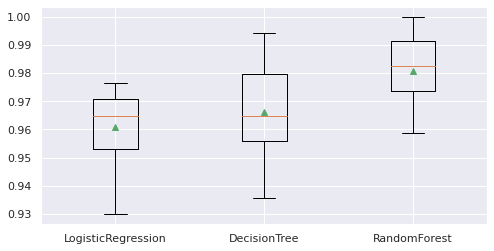

In [17]:
sns.set(rc={'figure.figsize':(8,4)})

bpGmean = list()

for i in range(len(resultados)):
  rr = resultados[i]['test_accuracy']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=names, showmeans=True)

print('Test Boxplots')
plt.show()

Se observa que el mejor modelo es el de random forest

In [18]:
import warnings
warnings.filterwarnings("ignore")

delta_train_sz = np.linspace(0.1,1, num=20)

RFModel = RandomForestClassifier()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSRF = GridSearchCV(estimator=RFModel,
            param_grid={'ccp_alpha': [.1,10,100],'criterion': ('gini', 'entropy'), 'max_depth': [1,3,5,7,9], 'min_samples_split':[2,4,6], 'class_weight':['balanced'], 'min_samples_leaf': [2,4,6]}, cv = kfold, scoring = 'recall')

GSRF.fit(Xtvt,ytv.values.ravel())
print("Best parameter (recall score=%0.3f):" % GSRF.best_score_)
print(GSRF.best_params_)

Best parameter (recall score=nan):
{'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [19]:
print("Best parameter (recall score=%0.3f):" % GSRF.best_score_)
print(GSRF.best_params_)

Best parameter (recall score=nan):
{'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [20]:
from pprint import pprint as pp

BestRFModel = RandomForestClassifier(ccp_alpha = 0.1, criterion = 'gini', max_depth = 1, min_samples_split = 2, class_weight = 'balanced', min_samples_leaf = 2)
BestRFModel.fit(Xtvt,ytv.values)
ypred = BestRFModel.predict(Xtestt)
r = classification_report(ytest, ypred)
print("This is the classification report of the best model:\n\n", r)

This is the classification report of the best model:

               precision    recall  f1-score   support

           1       0.61      1.00      0.76        87
           2       0.82      0.55      0.66        49
           3       1.00      0.50      0.67        78

    accuracy                           0.71       214
   macro avg       0.81      0.68      0.70       214
weighted avg       0.80      0.71      0.70       214



Confusion matrix, without normalization
[[86  1  0]
 [20 29  0]
 [30  9 39]]
Normalized confusion matrix
[[0.99 0.01 0.  ]
 [0.41 0.59 0.  ]
 [0.38 0.12 0.5 ]]


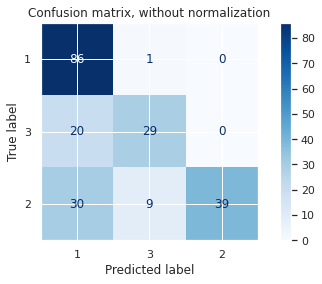

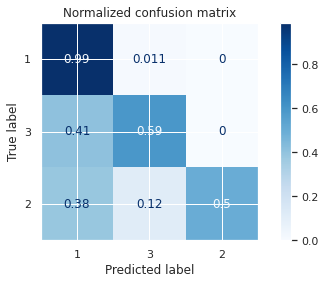

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = RandomForestClassifier(ccp_alpha = 0.1, criterion = 'gini', max_depth = 1, min_samples_split = 2, class_weight = 'balanced', min_samples_leaf = 2).fit(Xtvt,ytv.values)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xtestt,
        ytest,
        display_labels=ytest['SEMAFORO'].unique(),
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()